In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from urllib.request import urlretrieve
from importlib import reload
from icedef import test_case, metocean, simulator, drift
from icedef import statoil_arcticnet_data as statoil_data

# Beacon Data

In [3]:
beacon_metadata_url = 'http://icedef.munroelab.ca/data/StatoilArcticNet/drift_tracks/MunroeMetadata.csv'
beacon_metadata = pd.read_csv(beacon_metadata_url)
beacon_metadata.head()

BeaconID             IMEI  ArgosID  WMO  \
0    204980  300000000000000      NaN  NaN   
1    505190  300000000000000      NaN  NaN   
2    906790  300000000000000      NaN  NaN   
3    907780  300000000000000      NaN  NaN   

                                           DataOwner  DataSharingRestrictions  \
0  Water and Ice Research Laboratory, Carleton Un...                        1   
1  Water and Ice Research Laboratory, Carleton Un...                        1   
2  Water and Ice Research Laboratory, Carleton Un...                        1   
3  Water and Ice Research Laboratory, Carleton Un...                        1   

         Contact BeaconType Manufacturer Transmitter  \
0  Derek Mueller    FT-2000       Solara     Iridium   
1  Derek Mueller    FT-2000       Solara     Iridium   
2  Derek Mueller    FT-2000       Solara     Iridium   
3  Derek Mueller    FT-2000       Solara     Iridium   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           

             RelatedBeaconIDs  \
0    906790, 2790480, 2792490   
1             907780, 2791420   
2  204980, 2790480,  2792490    
3             505190, 2791420   

                                  AdditionalDatasets  \
0  sail/keel mapping with laser and multibeam, CT...   
1                     photogrammetry, laser scanning   
2  sail/keel mapping with laser and multibeam, CT...   
3                     photogrammetry, laser scanning   

                                  Project Photos_Y_N NumberPhotos  \
0  Statoil/ArcticNet Research Cruise 2015          Y            7   
1  Statoil/ArcticNet Research Cruise 2015          Y           10   
2  Statoil/ArcticNet Research Cruise 2015          Y   See 204980   
3  Statoil/ArcticNet Research Cruise 2015          Y   See 505190   

                   PhotoCredits  PhotoRestrictions  PhotoComments  \
0  Derek Mueller, Anna Crawford                  4            NaN   
1  Derek Mueller, Anna Crawford                  4            NaN   
2                    See 204980                  4            NaN   
3                    See 505190                  4            NaN   

                                          PhotoNames  \
0  204980_2015_approaching the saddle berg 1.JPG,...   
1  505190_2015_Approaching tabular berg.JPG, 5051...   
2                                         see 204980   
3                                         see 505190   

                                            Comments  
0  Beacon deployed during ArcticNet/Statoil/WIRL ...  
1  Beacon deployed during ArcticNet/Statoil/WIRL ...  
2  Beacon deployed during ArcticNet/Statoil/WIRL ...  
3  Beacon deployed during ArcticNet/Statoil/WIRL ...  

[4 rows x 62 columns]

In [4]:
def get_beacon_df(beacon_id):
    
    url = f'http://icedef.munroelab.ca/data/StatoilArcticNet/drift_tracks/0{beacon_id}_2015.csv'
    
    return pd.read_csv(url, parse_dates=['DataDate_UTC'])

beacon_id_list = list(beacon_metadata['BeaconID'].values)

beacon_df_dict = {}
beacon_ds_dict = {}

for beacon_id in beacon_id_list:
    
    beacon_df_dict[f'{beacon_id}'] = get_beacon_df(beacon_id)
    beacon_ds_dict[f'{beacon_id}'] = get_beacon_df(beacon_id).set_index('DataDate_UTC').to_xarray()

In [5]:
beacon_df_dict['204980'].head()

BeaconID BeaconType        DataDate_UTC  TransmissionDate_UTC  Latitude  \
0    204980     Solara 2015-04-24 15:16:06                   NaN  51.45991   
1    204980     Solara 2015-04-24 15:16:40                   NaN  51.45991   
2    204980     Solara 2015-04-24 15:17:14                   NaN  51.45993   
3    204980     Solara 2015-04-24 15:17:48                   NaN  51.45980   
4    204980     Solara 2015-04-24 15:18:14                   NaN  51.46008   

   Longitude  VBatt  AT  ST  BP  Heading  Speed  LocAccuracy  MessageIndex  \
0  -51.55144    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1  -51.55163    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
2  -51.55161    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
3  -51.55176    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
4  -51.55156    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   

   Satellites  GPSdelay  SNR  TTFF  
0         NaN       NaN  NaN   NaN  
1         NaN       NaN  NaN   NaN  
2         NaN       NaN  NaN   NaN  
3         NaN       NaN  NaN   NaN  
4         NaN       NaN  NaN   NaN

In [50]:
beacon_df_dict['505190'].tail()

BeaconID BeaconType        DataDate_UTC  TransmissionDate_UTC  Latitude  \
1426     50519     Solara 2015-05-31 21:06:54                   NaN  49.48090   
1427     50519     Solara 2015-05-31 23:09:35                   NaN  49.47462   
1428     50519     Solara 2015-06-01 00:09:20                   NaN  49.46967   
1429     50519     Solara 2015-06-01 01:09:05                   NaN  49.46971   
1430     50519     Solara 2015-06-01 02:09:54                   NaN  49.46962   

      Longitude  VBatt  AT  ST  BP  Heading  Speed  LocAccuracy  MessageIndex  \
1426  -53.58910    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1427  -53.58764    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1428  -53.58562    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1429  -53.58556    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1430  -53.58547    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   

      Satellites  GPSdelay  SNR  TTFF  
1426         NaN       NaN  NaN   NaN  
1427         NaN       NaN  NaN   NaN  
1428         NaN       NaN  NaN   NaN  
1429         NaN       NaN  NaN   NaN  
1430         NaN       NaN  NaN   NaN

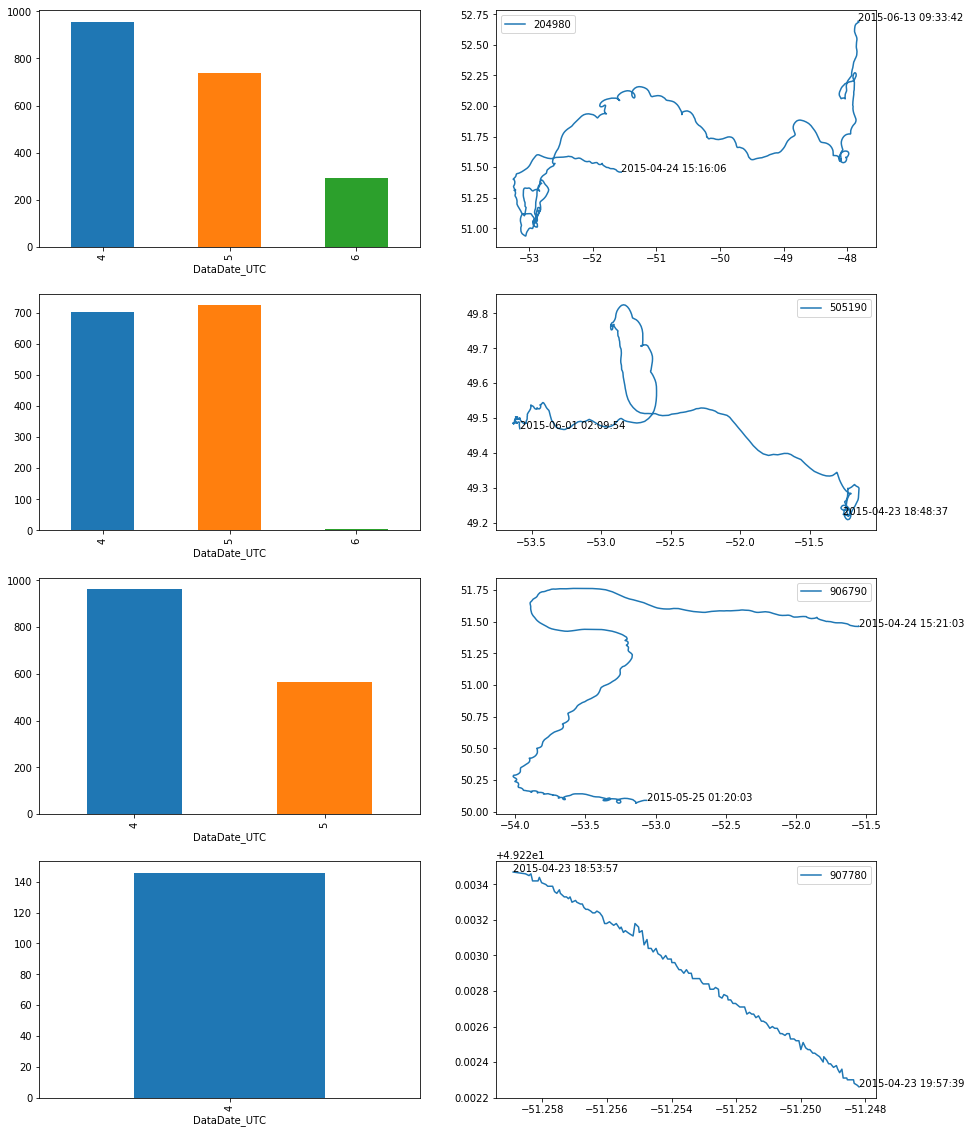

In [5]:
plt.figure(figsize=(15, 20))
i = 1
for key, df in beacon_df_dict.items():
    num_dfs = len(beacon_df_dict.keys())
    plt.subplot(num_dfs, 2, i)
    df['DataDate_UTC'].groupby(df['DataDate_UTC'].dt.month).count().plot(kind="bar", label=key)
    plt.subplot(num_dfs, 2, i + 1)
    plt.plot(df['Longitude'], df['Latitude'], label=key)
    plt.annotate(df['DataDate_UTC'][0], (df['Longitude'][0], df['Latitude'][0]))
    n = len(df)
    plt.annotate(df['DataDate_UTC'][n-1], (df['Longitude'][n-1], df['Latitude'][n-1]))
    plt.legend()
    i += 2
plt.show()

# AVOS Data

In [7]:
avos_df = pd.read_csv('http://icedef.munroelab.ca/data/StatoilArcticNet/AVOS_2015.csv', sep=' ; ')
bad_rows = np.where((avos_df['Longitude'] > 180) | (avos_df['Longitude'] < -180) |
                    (avos_df['Latitude'] > 180) | (avos_df['Latitude'] < -180))[0]

avos_df = avos_df.drop(avos_df.index[bad_rows])
avos_df['Date'] = avos_df['Date'].str.replace('/', '-')
avos_df['Date'] = pd.to_datetime(avos_df['Date'])
avos_df['Wind speed'] = pd.to_numeric(avos_df['Wind speed'])
avos_df['Wind dir'] = pd.to_numeric(avos_df['Wind dir'])

avos_ds = avos_df.set_index('Date').to_xarray()

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
min(avos_df['Date']), max(avos_df['Date'])

(Timestamp('2015-04-16 00:00:00'), Timestamp('2015-11-01 23:00:00'))

# ADCP Data

In [9]:
file_loc, message = urlretrieve('http://icedef.munroelab.ca/data/StatoilArcticNet/Leg1_1501_ADCP/an1501_os150bb.nc')

In [10]:
adcp_ds = xr.open_dataset(file_loc)

In [11]:
min(adcp_ds.time.values), max(adcp_ds.time.values) 

(numpy.datetime64('2015-04-17T12:32:17.000000000'),
 numpy.datetime64('2015-05-03T10:24:40.000000000'))

# Data Subsets

In [12]:
beacon_subset_dict = {}

for key, ds in beacon_ds_dict.items():
    
        beacon_subset_dict[key] = ds.where((ds.Latitude > 40) & (ds.Latitude < 60) & \
                                          (ds.Longitude > -60) & (ds.Longitude < -40), drop=True)

In [13]:
adcp_subset = adcp_ds.where((adcp_ds.lat < 60) & (adcp_ds.lat > 40) & \
                            (adcp_ds.lon < -40) & (adcp_ds.lon > -60) & \
                            (adcp_ds.u < 10) & (adcp_ds.u > -10) & \
                            (adcp_ds.v < 10) & (adcp_ds.v > -10), drop=True)

In [14]:
avos_subset = avos_ds.where((avos_ds['Latitude'] < 60) & (avos_ds['Latitude'] > 40) & \
                           (avos_ds['Longitude'] < -40) & (avos_ds['Longitude'] > -60), drop=True)

avos_subset = avos_subset.where(avos_subset['Date'] < adcp_subset['time'].values[-1], drop=True)

In [15]:
min_time = max([avos_subset['Date'].min(), adcp_ds['time'].min()]).values
max_time = min([avos_subset['Date'].max(), adcp_ds['time'].max()]).values

In [16]:
min_time, max_time

(numpy.datetime64('2015-04-19T08:00:00.000000000'),
 numpy.datetime64('2015-04-30T03:00:00.000000000'))

In [17]:
adcp_subset = adcp_subset.where((adcp_subset['time'] >= min_time) & (adcp_subset['time'] <= max_time), drop=True)
avos_subset = avos_subset.where((avos_subset['Date'] >= min_time) & (avos_subset['Date'] <= max_time), drop=True)

for key, ds in beacon_subset_dict.items():
    
        beacon_subset_dict[key] = ds.where((ds['DataDate_UTC'] >= min_time) & \
                                           (ds['DataDate_UTC'] <= max_time), drop=True)

In [18]:
beacon_df_dict['204980'].head()

BeaconID BeaconType        DataDate_UTC  TransmissionDate_UTC  Latitude  \
0    204980     Solara 2015-04-24 15:16:06                   NaN  51.45991   
1    204980     Solara 2015-04-24 15:16:40                   NaN  51.45991   
2    204980     Solara 2015-04-24 15:17:14                   NaN  51.45993   
3    204980     Solara 2015-04-24 15:17:48                   NaN  51.45980   
4    204980     Solara 2015-04-24 15:18:14                   NaN  51.46008   

   Longitude  VBatt  AT  ST  BP  Heading  Speed  LocAccuracy  MessageIndex  \
0  -51.55144    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1  -51.55163    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
2  -51.55161    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
3  -51.55176    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
4  -51.55156    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   

   Satellites  GPSdelay  SNR  TTFF  
0         NaN       NaN  NaN   NaN  
1         NaN       NaN  NaN   NaN  
2         NaN       NaN  NaN   NaN  
3         NaN       NaN  NaN   NaN  
4         NaN       NaN  NaN   NaN

In [86]:
atm.dataset

<xarray.Dataset>
Dimensions:                  (latitude: 80, longitude: 81, time: 104)
Coordinates:
  * longitude                (longitude) float32 -60.0 -59.75 -59.5 -59.25 ...
  * latitude                 (latitude) float32 40.125 40.375 40.625 40.875 ...
  * time                     (time) datetime64[ns] 2015-04-19 ...
Data variables:
    eastward_wind_velocity   (time, latitude, longitude) float32 dask.array<shape=(104, 80, 81), chunksize=(8, 80, 81)>
    northward_wind_velocity  (time, latitude, longitude) float32 dask.array<shape=(104, 80, 81), chunksize=(8, 80, 81)>
Attributes:
    CDI:            Climate Data Interface version 1.8.2 (http://mpimet.mpg.d...
    Conventions:    CF-1.2
    history:        Mon Jul 02 12:36:17 2018: cdo splitday 201504.nc 201504\n...
    source:         http://www.emc.ncep.noaa.gov/mmb/rreanl/index.html
    institution:    National Centers for Environmental Prediction
    centerlat:      50.0
    centerlon:      -107.0
    latcorners:     [ 1.00000

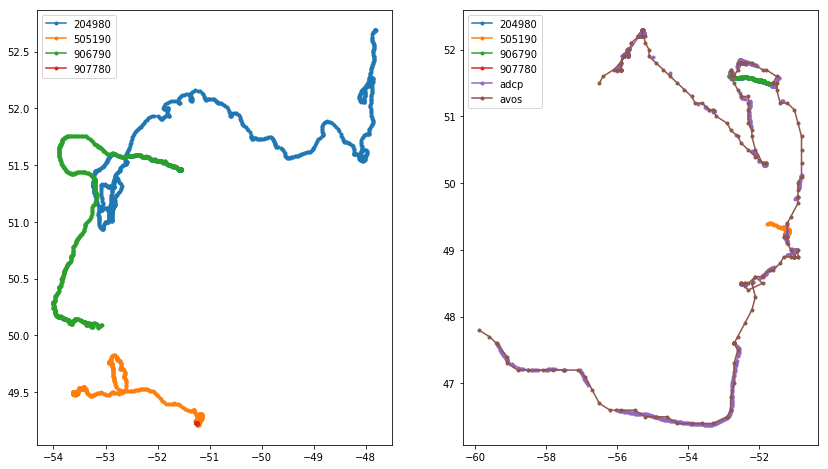

In [18]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
for key, ds in beacon_ds_dict.items():
    plt.plot(ds['Longitude'], ds['Latitude'], '.-', label=key)
plt.legend()

plt.subplot(1, 2, 2)
for key, ds in beacon_subset_dict.items():    
    plt.plot(ds['Longitude'], ds['Latitude'], '.-', label=key)
plt.plot(adcp_subset['lon'].values[:, 0], adcp_subset['lat'].values[:, 0], '.-', label='adcp')
plt.plot(avos_subset['Longitude'].values, avos_subset['Latitude'].values, '.-', label='avos')
plt.legend()

plt.show()

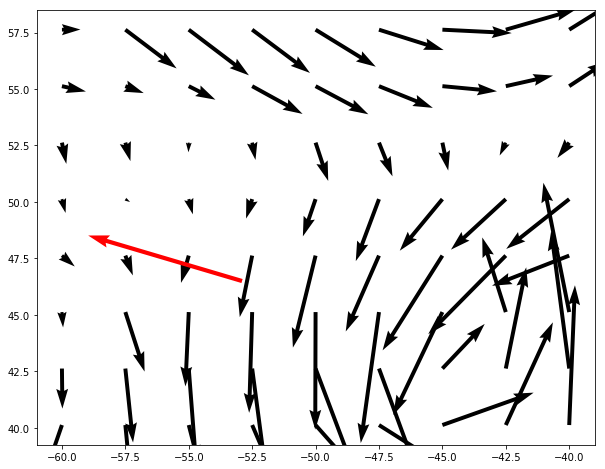

2015-04-20T09:00:00.000000000
2015-04-20T08:00:00.000000000


In [85]:
gap = 10
plt.figure(figsize=(10, 8))
plt.quiver(atm.eastward_wind_velocities.longitude.values[::gap], 
           atm.northward_wind_velocities.latitude.values[::gap],
          atm.eastward_wind_velocities.values[11, ::gap, ::gap], 
           atm.northward_wind_velocities.values[11, ::gap, ::gap], scale=80)
plt.quiver(good_lons[24], good_lats[24], avos_subset_u.values[24], avos_subset_v.values[24], 
           scale=80, color='red')
plt.show()
print(atm.eastward_wind_velocities.time.values[11])
print(good_times[24])

In [71]:
avos_subset_u.values[0], avos_subset_v.values[0]

(9.248358885119286, 14.264215994299692)

In [77]:
avos_subset['Date'][24]

<xarray.DataArray 'Date' ()>
array('2015-04-20T08:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    Date     datetime64[ns] 2015-04-20T08:00:00

In [80]:
atm.eastward_wind_velocities.time[11]

<xarray.DataArray 'time' ()>
array('2015-04-20T09:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-04-20T09:00:00

In [67]:
good_times[0]

numpy.datetime64('2015-04-19T08:00:00.000000000')

In [58]:
good_lons[0], good_lats[0], avos_subset_u[0], avos_subset_v[0]

(-59.9, 47.8, <xarray.DataArray ()>
 array(9.248359)
 Coordinates:
     Date     datetime64[ns] 2015-04-19T08:00:00, <xarray.DataArray ()>
 array(14.264216)
 Coordinates:
     Date     datetime64[ns] 2015-04-19T08:00:00)

In [55]:
atm.eastward_wind_velocities.time.values[0]

numpy.datetime64('2015-04-19T00:00:00.000000000')

# Time Series Vector Plots

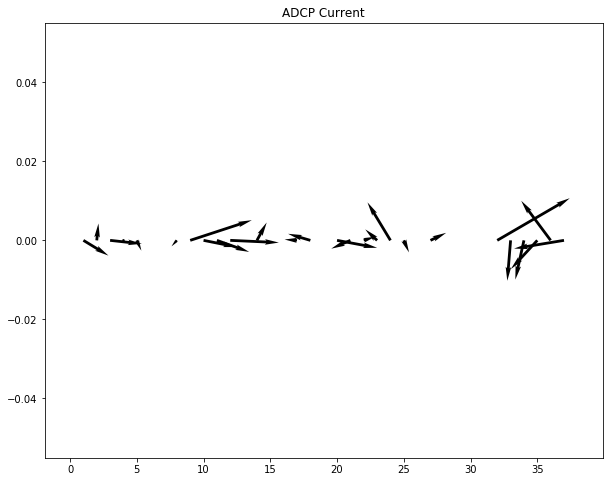

In [20]:
plt.figure(figsize=(10, 8))
gap = 50
plt.quiver(np.arange(len(adcp_subset['time'][::gap])), np.arange(len(adcp_subset['time'][::gap])) * 0, 
           adcp_subset['u'][::gap, 0], adcp_subset['v'][::gap, 0], headwidth=2, width=0.005, angles='uv')
plt.title('ADCP Current')
plt.show()

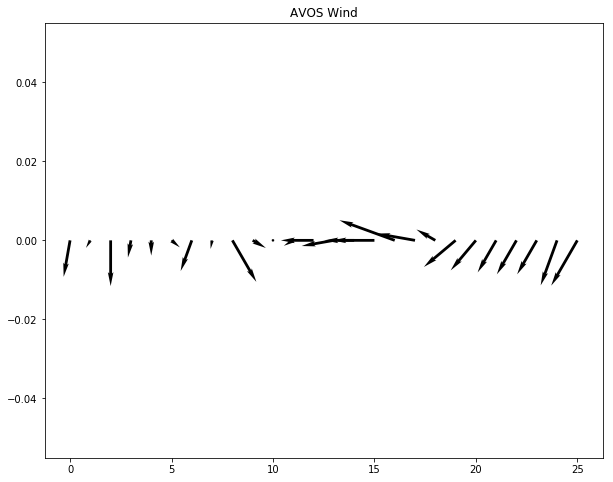

In [21]:
plt.figure(figsize=(10, 8))
gap = 10
avos_subset_u = -avos_subset['Wind speed'] * np.sin(np.deg2rad(avos_subset['Wind dir']))
avos_subset_v = -avos_subset['Wind speed'] * np.cos(np.deg2rad(avos_subset['Wind dir']))
plt.quiver(np.arange(len(avos_subset['Date'][::gap])), np.arange(len(avos_subset['Date'][::gap])) * 0, 
           avos_subset_u[::gap], avos_subset_v[::gap], headwidth=2, width=0.005, angles='uv')
plt.title('AVOS Wind')
plt.show()

# Compare by Interpolating

In [22]:
date_bounds = min_time, max_time 
ocean = metocean.ECMWFOcean(date_bounds)
atm = metocean.NARRAtmosphere(date_bounds)

Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150419.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150420.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150421.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150422.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150423.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150424.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150425.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150426.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150427.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF/ocean/daily/20150428.nc... done.
Attempting to download http://icedef.munroelab.ca/data/ECMWF

### Current

In [23]:
adcp_subset.u[100:200, 0]

<xarray.DataArray 'u' (time: 100)>
array([ 0.009325,  0.017314, -0.0014  ,  0.018642,  0.009318,  0.007811,
        0.061733,  0.011993, -0.006536, -0.052452, -0.102835, -0.025994,
       -0.038184,  0.006215,       nan,  0.072725,  0.028601,  0.053706,
        0.007897, -0.026674, -0.007829, -0.032264, -0.012919, -0.005905,
        0.034016, -0.022858, -0.011607, -0.018801, -0.00354 , -0.044971,
       -0.029185, -0.004115, -0.021322,  0.006738, -0.069387, -0.133959,
        0.201135,  0.063921,  0.101437,  0.127542,  0.117774,  0.125811,
        0.120375,  0.107413,  0.1195  ,  0.19816 ,  0.112181,  0.152645,
        0.175369,  0.125058,  0.175363,  0.132848,  0.128117,  0.13387 ,
        0.124569,  0.151783,  0.207336,  0.170722,  0.140471,  0.131053,
        0.132334,  0.155229,  0.173038,  0.129732,  0.14531 ,  0.099728,
        0.08759 ,  0.0893  ,  0.080082,  0.082882,  0.08267 ,  0.116318,
        0.064731,  0.080369,  0.070024,  0.091661,  0.117514,  0.073298,
        0.118594

In [24]:
adcp_subset.u.values[:, 0]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [25]:
adcp_subset.lon

<xarray.DataArray 'lon' (time: 1934, depth_cell: 30)>
array([[       nan, -59.951389, -59.951389, ..., -59.951389, -59.951389,
        -59.951389],
       [       nan, -59.920797, -59.920797, ..., -59.920797, -59.920797,
        -59.920797],
       [       nan, -59.890319, -59.890319, ..., -59.890319, -59.890319,
        -59.890319],
       ...,
       [       nan, -56.489403, -56.489403, ...,        nan,        nan,
               nan],
       [       nan, -56.500244, -56.500244, ...,        nan,        nan,
               nan],
       [       nan, -56.514728, -56.514728, ...,        nan,        nan,
               nan]])
Coordinates:
  * time     (time) datetime64[ns] 2015-04-19T08:03:53 2015-04-19T08:08:54 ...
Dimensions without coordinates: depth_cell
Attributes:
    C_format:       %9.4f
    long_name:      Longitude
    standard_name:  longitude
    data_min:       -71.197
    units:          degrees_east
    data_max:       -50.7460638888889

In [26]:
u_list = []
v_list = []
good_times = []
good_lats = []
good_lons = []
u_adcp_list = []
v_adcp_list = []

for i in range(len(adcp_subset.time) - 1):
    if abs(adcp_subset.u.values[i, 0]) < 10 and abs(adcp_subset.u.values[i, 0]) < 10:
        
        try:
            u_list.append(ocean.eastward_current_velocities.interp(time=adcp_subset.time.values[i], 
                                                                   latitude=adcp_subset.lat.values[i, 0], 
                                                                   longitude=adcp_subset.lon.values[i, 0], 
                                                                   assume_sorted=True).values)

            v_list.append(ocean.northward_current_velocities.interp(time=adcp_subset.time.values[i], 
                                                                    latitude=adcp_subset.lat.values[i, 0], 
                                                                    longitude=adcp_subset.lon.values[i, 0], 
                                                                    assume_sorted=True).values)
            good_times.append(adcp_subset.time.values[i])
            good_lats.append(adcp_subset.lat.values[i, 0])
            good_lons.append(adcp_subset.lon.values[i, 0])

            u_adcp_list.append(adcp_subset.u.values[i, 0])
            v_adcp_list.append(adcp_subset.v.values[i, 0])
        
        except KeyError:
            pass

ocean_interp_ds = xr.Dataset({'u': (['time'], u_list), 'v': (['time'], v_list)},
                             coords={'time': good_times, 'lat': good_lats, 'lon': good_lons})

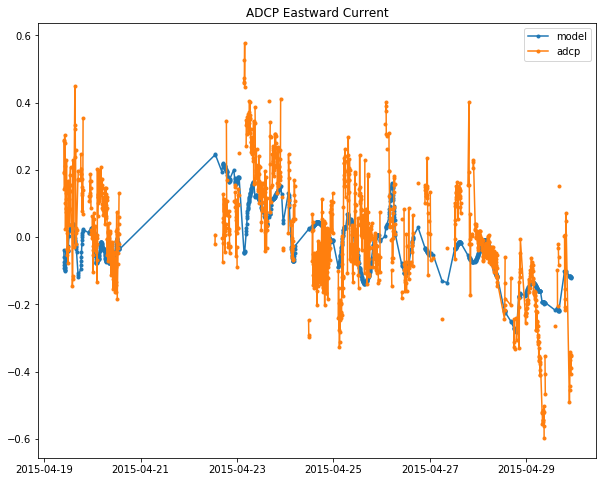

In [27]:
plt.figure(figsize=(10, 8))
plt.plot(ocean_interp_ds.time.values, ocean_interp_ds.u.values, '.-', label='model')
plt.plot(adcp_subset['time'].values, adcp_subset.u[:, 0].values, '.-', label='adcp')
plt.title('ADCP Eastward Current')
plt.legend()
plt.show()

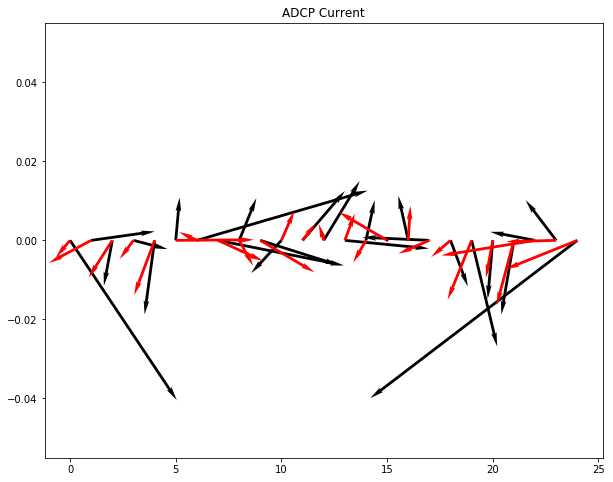

In [28]:
# Y-AXIS LABELS ARE WRONG

plt.figure(figsize=(10, 8))
gap = 50
scale = 1.5
plt.quiver(u_adcp_list[::gap], v_adcp_list[::gap], 
           headwidth=2, width=0.005, angles='uv', scale=scale, label='adcp')
plt.quiver(ocean_interp_ds['u'][::gap], ocean_interp_ds['v'][::gap], 
           headwidth=2, width=0.005, angles='uv', color='red', scale=scale, label='model')
plt.title('ADCP Current')
plt.show()

### Wind

In [56]:
u_list = []
v_list = []
good_times = []
good_lats = []
good_lons = []


for i in range(len(avos_subset['Date']) - 1):
    try:
        u_list.append(atm.eastward_wind_velocities.interp(time=avos_subset['Date'].values[i], 
                                                          latitude=avos_subset['Latitude'].values[i], 
                                                          longitude=avos_subset['Longitude'].values[i], 
                                                          assume_sorted=True).values)
        
        v_list.append(atm.northward_wind_velocities.interp(time=avos_subset['Date'].values[i], 
                                                           latitude=avos_subset['Latitude'].values[i], 
                                                           longitude=avos_subset['Longitude'].values[i], 
                                                           assume_sorted=True).values)
        good_times.append(avos_subset['Date'].values[i])
        good_lats.append(avos_subset['Latitude'].values[i])
        good_lons.append(avos_subset['Longitude'].values[i])
        
    except KeyError:
        pass

atm_interp_ds = xr.Dataset({'u': (['time'], u_list), 'v': (['time'], v_list)},
                           coords={'time': good_times, 'lat': good_lats, 'lon': good_lons})

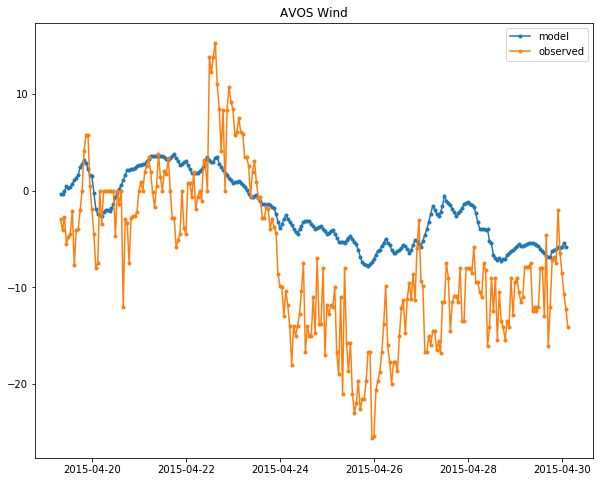

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(atm_interp_ds.time.values, atm_interp_ds.u.values, '.-', label='model')
plt.plot(avos_subset['Date'].values, avos_subset_u, '.-', label='observed')
plt.title('AVOS Wind')
plt.legend()
plt.show()

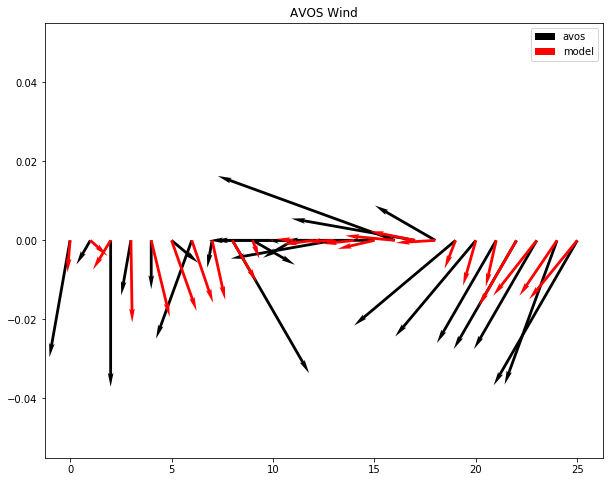

In [31]:
# Y-AXIS LABELS ARE WRONG

plt.figure(figsize=(10, 8))
gap = 10
scale = 80
plt.quiver(avos_subset_u[::gap], avos_subset_v[::gap], 
           headwidth=2, width=0.005, angles='uv', scale=scale, label='avos')
plt.quiver(atm_interp_ds['u'][::gap], atm_interp_ds['v'][::gap], 
           headwidth=2, width=0.005, angles='uv', color='red', scale=scale, label='model')
plt.title('AVOS Wind')
plt.legend()
plt.show()

### Wind and Current

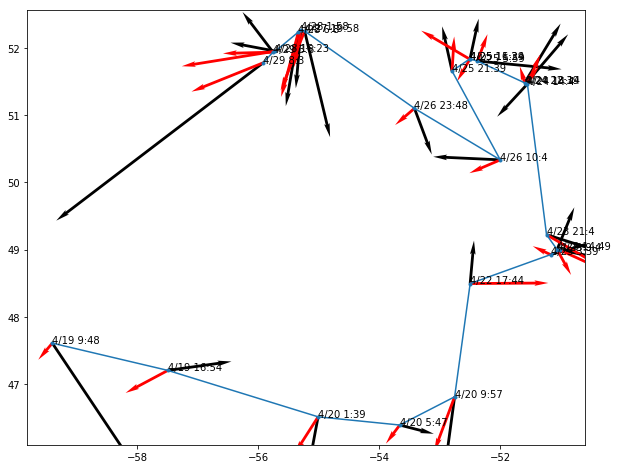

In [32]:
plt.figure(figsize=(10, 8))
gap = 50
scale = 1.5
plt.plot(ocean_interp_ds['lon'].values[::gap], ocean_interp_ds['lat'].values[::gap], '.-')

for i in np.arange(0, len(ocean_interp_ds['time']), gap):
    time = pd.Timestamp(ocean_interp_ds['time'].values[i])
    annotation = f'{time.month}/{time.day} {time.hour}:{time.minute}'
    plt.annotate(annotation, 
                 (ocean_interp_ds['lon'].values[i], ocean_interp_ds['lat'].values[i]))

plt.quiver(ocean_interp_ds['lon'].values[::gap], ocean_interp_ds['lat'].values[::gap],
           u_adcp_list[::gap], v_adcp_list[::gap], headwidth=2, width=0.005, angles='uv',
           scale=scale)
plt.quiver(ocean_interp_ds['lon'].values[::gap], ocean_interp_ds['lat'].values[::gap],
           ocean_interp_ds['u'][::gap], ocean_interp_ds['v'][::gap], headwidth=2, width=0.005, angles='uv', 
           color='red', scale=scale)
plt.show()

# Plotting ADCP at Depth

In [33]:
adcp_subset.lat[:10, 1]

<xarray.DataArray 'lat' (time: 10)>
array([47.780644, 47.779014, 47.777239, 47.775525, 47.773678, 47.771753,
       47.770156, 47.767639, 47.764694, 47.760467])
Coordinates:
  * time     (time) datetime64[ns] 2015-04-19T08:03:53 2015-04-19T08:08:54 ...
Attributes:
    C_format:       %9.4f
    long_name:      Latitude
    standard_name:  latitude
    data_min:       46.376980555555555
    units:          degrees_north
    data_max:       52.301858333333335

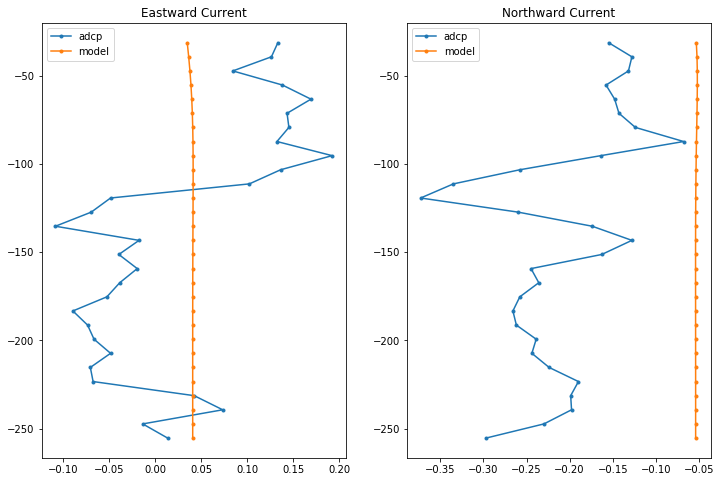

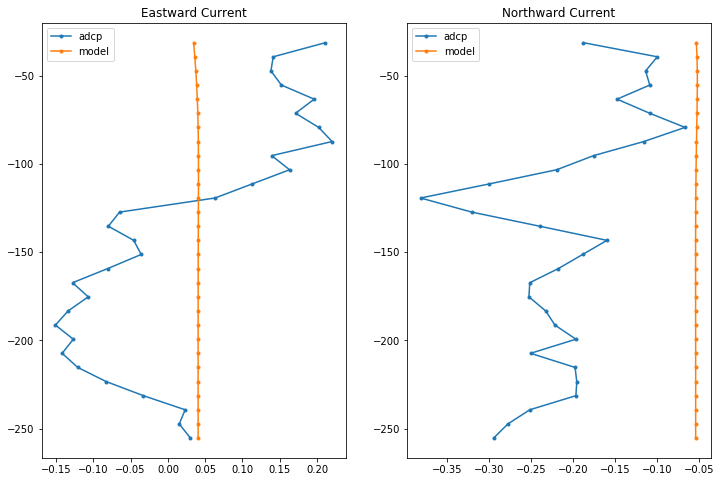

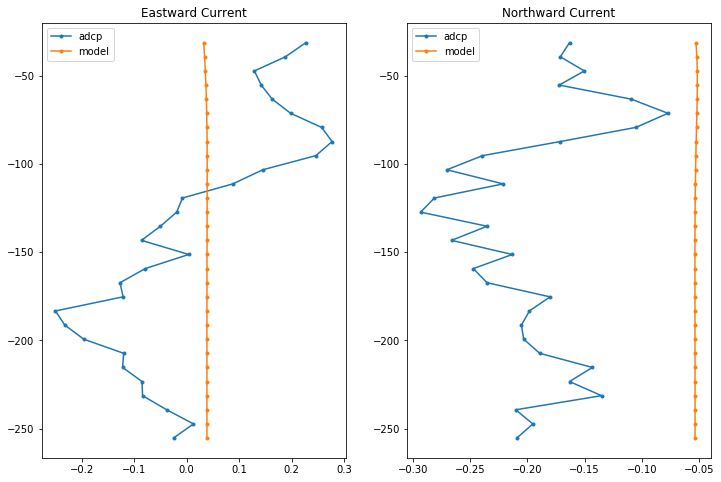

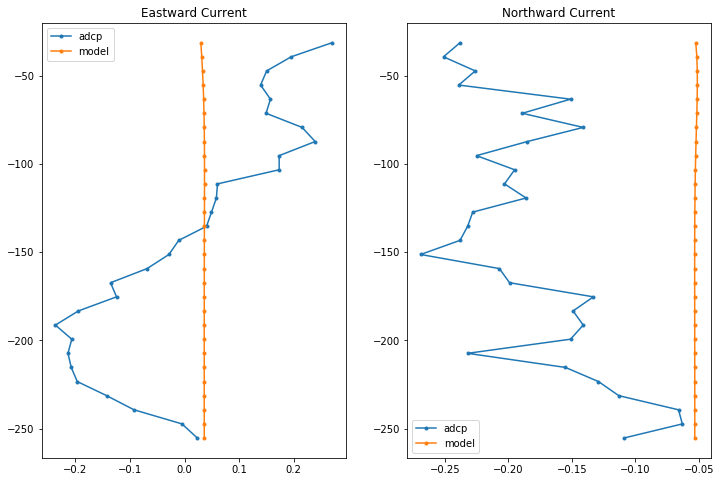

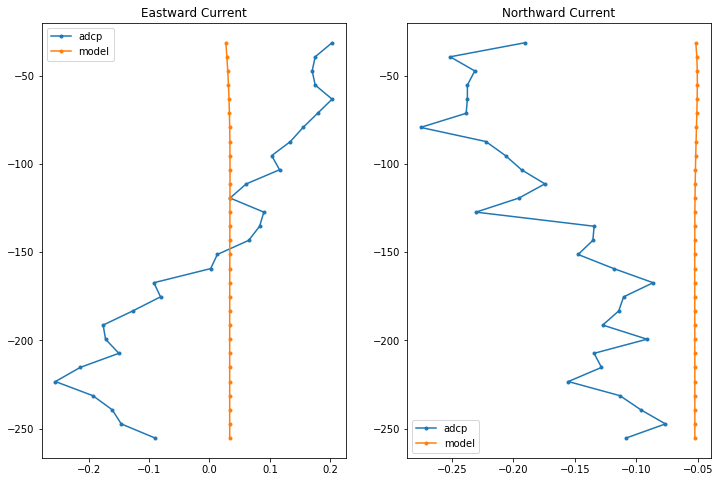

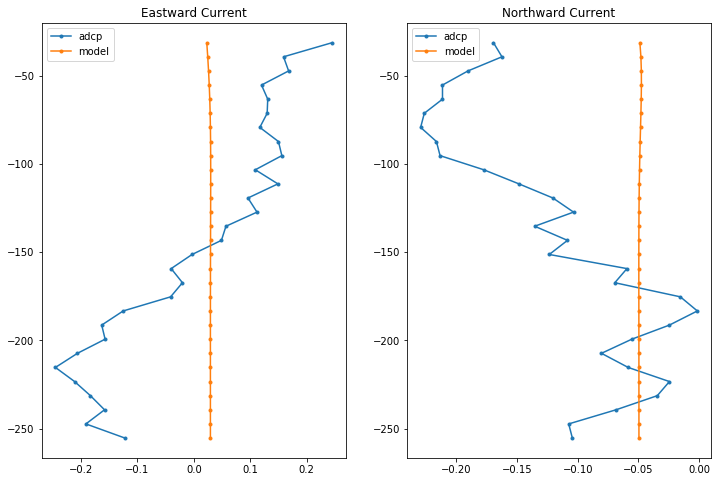

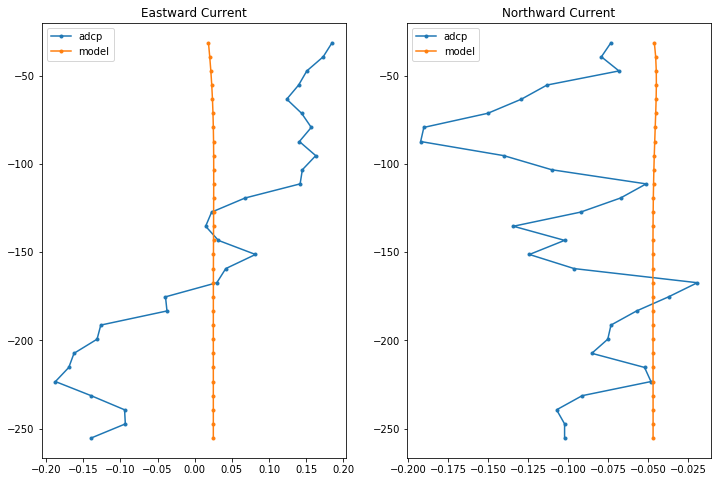

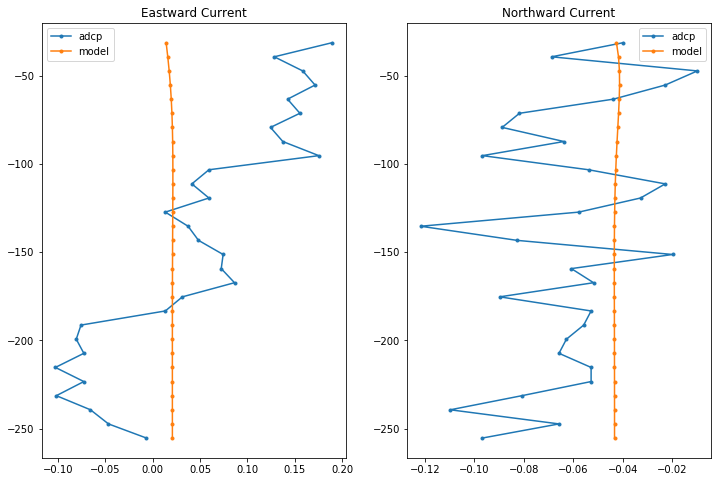

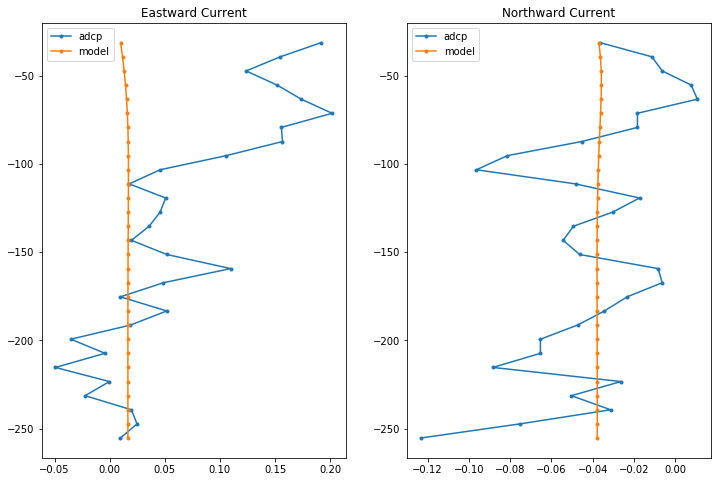

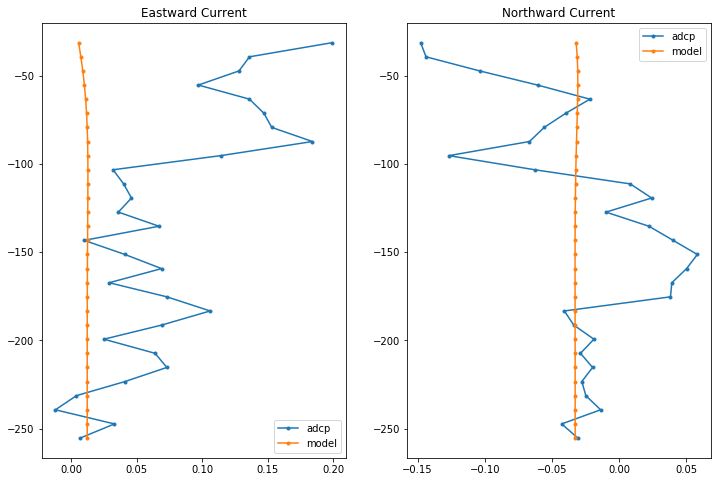

In [34]:
for i in range(10):

    time = adcp_subset.time.values[i]
    latitude = adcp_subset.lat.values[i, 1]
    longitude = adcp_subset.lon.values[i, 1]
    depth_vec = -adcp_subset.depth.values[i, :35]

    try:
        surface_current_u = float(ocean.eastward_current_velocities.interp(time=time, latitude=latitude, longitude=longitude, 
                                                                     assume_sorted=True).values)

        surface_current_v = float(ocean.northward_current_velocities.interp(time=time, latitude=latitude, longitude=longitude, 
                                                                     assume_sorted=True).values)

        wind_u = float(atm.eastward_wind_velocities.interp(time=time, latitude=latitude, longitude=longitude, 
                                                     assume_sorted=True).values)

        wind_v = float(atm.northward_wind_velocities.interp(time=time, latitude=latitude, longitude=longitude, 
                                                      assume_sorted=True).values)

        wind = wind_u, wind_v
        surface_current = surface_current_u, surface_current_v
        current_u_vec, current_v_vec = drift.compute_ekman_spiral(wind, surface_current, depth_vec, latitude)

        plt.figure(figsize=(12, 8))

        plt.subplot(1, 2, 1)
        plt.title('Eastward Current')
        plt.plot(adcp_subset.u[i, :], -adcp_subset.depth[i, :], '.-', label='adcp') 
        plt.plot(current_u_vec, depth_vec, '.-', label='model')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title('Northward Current')
        plt.plot(adcp_subset.v[i, :], -adcp_subset.depth[i, :], '.-', label='adcp') 
        plt.plot(current_v_vec, depth_vec, '.-', label='model')
        plt.legend()

        plt.show()
    
    except KeyError:
        pass

# Simulation

In [35]:
statoil_df = statoil_data.get_df(statoil_data.dir_path, statoil_data.csv_filenames[2])

In [36]:
statoil_df.loc[(statoil_df['DataDate_UTC'] > np.datetime64('2015-04-27')) & (statoil_df['DataDate_UTC'] < np.datetime64('2015-04-29'))]

BeaconID BeaconType        DataDate_UTC  TransmissionDate_UTC  Latitude  \
867     90679     Solara 2015-04-27 00:48:46                   NaN  51.53961   
868     90679     Solara 2015-04-27 01:48:39                   NaN  51.53945   
869     90679     Solara 2015-04-27 02:48:22                   NaN  51.53903   
870     90679     Solara 2015-04-27 03:48:43                   NaN  51.53830   
871     90679     Solara 2015-04-27 04:48:28                   NaN  51.53709   
872     90679     Solara 2015-04-27 05:48:13                   NaN  51.53609   
873     90679     Solara 2015-04-27 06:48:16                   NaN  51.53544   
874     90679     Solara 2015-04-27 07:48:24                   NaN  51.53505   
875     90679     Solara 2015-04-27 08:48:15                   NaN  51.53429   
876     90679     Solara 2015-04-27 09:48:00                   NaN  51.53489   
877     90679     Solara 2015-04-27 10:48:09                   NaN  51.53698   
878     90679     Solara 2015-04-27 11:48:16                   NaN  51.54092   
879     90679     Solara 2015-04-27 12:48:04                   NaN  51.54350   
880     90679     Solara 2015-04-27 13:47:49                   NaN  51.54651   
881     90679     Solara 2015-04-27 14:48:05                   NaN  51.54867   
882     90679     Solara 2015-04-27 15:47:53                   NaN  51.54964   
883     90679     Solara 2015-04-27 16:47:37                   NaN  51.54993   
884     90679     Solara 2015-04-27 17:47:25                   NaN  51.54987   
885     90679     Solara 2015-04-27 18:47:42                   NaN  51.54865   
886     90679     Solara 2015-04-27 19:47:48                   NaN  51.54822   
887     90679     Solara 2015-04-27 20:47:32                   NaN  51.54721   
888     90679     Solara 2015-04-27 21:47:18                   NaN  51.54790   
889     90679     Solara 2015-04-27 22:47:35                   NaN  51.54902   
890     90679     Solara 2015-04-27 23:47:25                   NaN  51.55020   
891     90679     Solara 2015-04-28 00:47:11                   NaN  51.55381   
892     90679     Solara 2015-04-28 01:47:25                   NaN  51.55754   
893     90679     Solara 2015-04-28 02:47:17                   NaN  51.56064   
894     90679     Solara 2015-04-28 03:47:18                   NaN  51.56399   
895     90679     Solara 2015-04-28 04:47:02                   NaN  51.56760   
896     90679     Solara 2015-04-28 05:46:50                   NaN  51.57114   
897     90679     Solara 2015-04-28 06:47:05                   NaN  51.57396   
898     90679     Solara 2015-04-28 07:46:50                   NaN  51.57550   
899     90679     Solara 2015-04-28 08:47:24                   NaN  51.57705   
900     90679     Solara 2015-04-28 09:47:13                   NaN  51.57577   
901     90679     Solara 2015-04-28 10:46:57                   NaN  51.57447   
902     90679     Solara 2015-04-28 11:47:20                   NaN  51.57275   
903     90679     Solara 2015-04-28 12:47:03                   NaN  51.57208   
904     90679     Solara 2015-04-28 13:47:52                   NaN  51.57214   
905     90679     Solara 2015-04-28 14:47:44                   NaN  51.57560   
906     90679     Solara 2015-04-28 15:47:36                   NaN  51.58124   
907     90679     Solara 2015-04-28 16:47:19                   NaN  51.58559   
908     90679     Solara 2015-04-28 17:47:02                   NaN  51.58803   
909     90679     Solara 2015-04-28 18:46:46                   NaN  51.58858   
910     90679     Solara 2015-04-28 19:47:16                   NaN  51.58943   
911     90679     Solara 2015-04-28 20:47:00                   NaN  51.59096   
912     90679     Solara 2015-04-28 21:46:44                   NaN  51.59064   
913     90679     Solara 2015-04-28 22:46:49                   NaN  51.58831   
914     90679     Solara 2015-04-28 23:46:48                   NaN  51.58731   

     Longitude  VBatt  AT  ST  BP  Heading  Speed  LocAccuracy  MessageIndex  \
867 

In [37]:
tc = test_case.TestCase(index_range=(867, 914))
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats
start_location = (tc.start_latitude, tc.start_longitude)
time_frame = (tc.start_time, tc.end_time)
start_velocity = tc.start_velocity

In [38]:
time_frame

(numpy.datetime64('2015-04-27T00:48:46.000000'),
 numpy.datetime64('2015-04-28T23:46:48.000000'))

In [39]:
sim = simulator.Simulator()

sim.run_simulation(start_location, time_frame, store_results_as='204980')

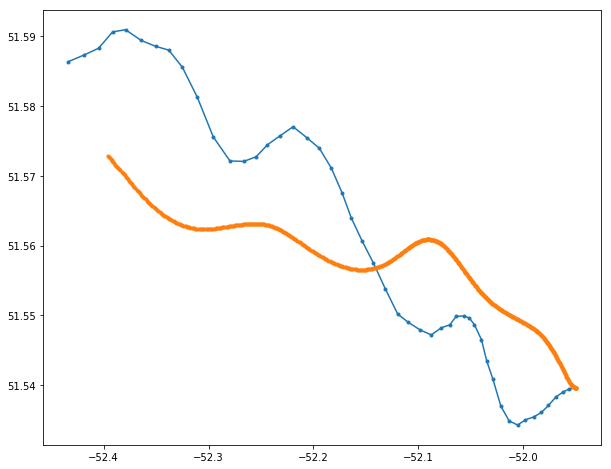

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(ref_lons, ref_lats, '.-')
plt.plot(sim.results['204980']['longitude'], sim.results['204980']['latitude'], '.-')
plt.show()

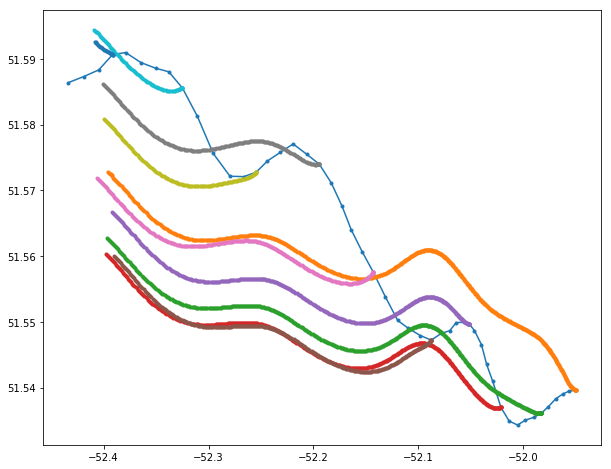

In [41]:
step = 5

plt.figure(figsize=(10, 8))
plt.plot(ref_lons, ref_lats, '.-')

for i in np.arange(0, len(ref_times), step):
    
    sim.run_simulation((ref_lats.values[i], ref_lons.values[i]), (ref_times[i], end_time), 
                       store_results_as=f'204980_{i}')

    plt.plot(sim.results[f'204980_{i}']['longitude'], sim.results[f'204980_{i}']['latitude'], '.-')
    
plt.show()

# Old Code

In [42]:
max_of_mins = max([np.datetime64(min(beacon_df_dict['204980']['DataDate_UTC'])), 
                   np.datetime64(min(avos_df['Date'])), 
                   min(adcp_ds.time.values)])

min_of_maxs = min([np.datetime64(max(beacon_df_dict['204980']['DataDate_UTC'])), 
                   np.datetime64(max(avos_df['Date'])), 
                   max(adcp_ds.time.values)])

max_of_mins, min_of_maxs

(numpy.datetime64('2015-04-24T15:16:06.000000'),
 numpy.datetime64('2015-05-03T10:24:40.000000000'))

In [43]:
beacon_min_index = np.where(beacon_df_dict['204980']['DataDate_UTC'] >= max_of_mins)[0][0]
avos_min_index = np.where(avos_df['Date'] >= max_of_mins)[0][0]
adcp_min_index = np.where(adcp_ds.time.values >= max_of_mins)[0][0]

beacon_min_index, avos_min_index, adcp_min_index

(0, 178, 2023)

In [44]:
beacon_max_index = np.where(beacon_df_dict['204980']['DataDate_UTC'] <= min_of_maxs)[0][-1]
avos_max_index = np.where(avos_df['Date'] <= min_of_maxs)[0][-1]
adcp_max_index = np.where(adcp_ds.time.values <= min_of_maxs)[0][-1]

beacon_max_index, avos_max_index, adcp_max_index

(1011, 387, 4543)

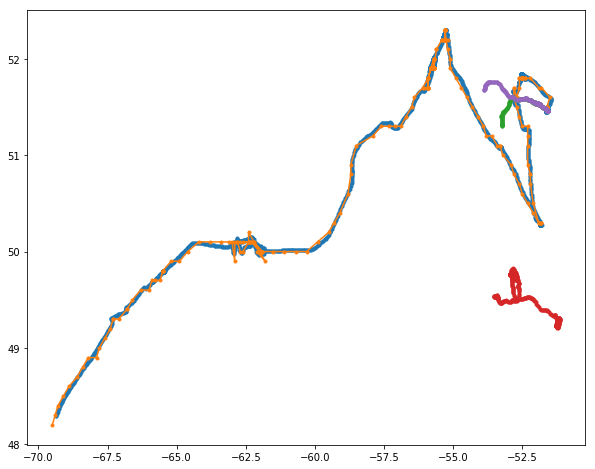

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(adcp_ds.lon[adcp_min_index : adcp_max_index + 1], adcp_ds.lat[adcp_min_index : adcp_max_index + 1], '.-')
plt.plot(avos_df['Longitude'][avos_min_index : avos_max_index + 1], avos_df['Latitude'][avos_min_index : avos_max_index + 1], '.-')
plt.plot(beacon_df_dict['204980']['Longitude'][beacon_min_index : beacon_max_index + 1], 
        beacon_df_dict['204980']['Latitude'][beacon_min_index : beacon_max_index + 1], '.-')
plt.plot(beacon_df_dict['505190']['Longitude'][beacon_min_index : beacon_max_index + 1], 
        beacon_df_dict['505190']['Latitude'][beacon_min_index : beacon_max_index + 1], '.-')
plt.plot(beacon_df_dict['906790']['Longitude'][beacon_min_index : beacon_max_index + 1], 
        beacon_df_dict['906790']['Latitude'][beacon_min_index : beacon_max_index + 1], '.-')
plt.show()

## ADCP Union

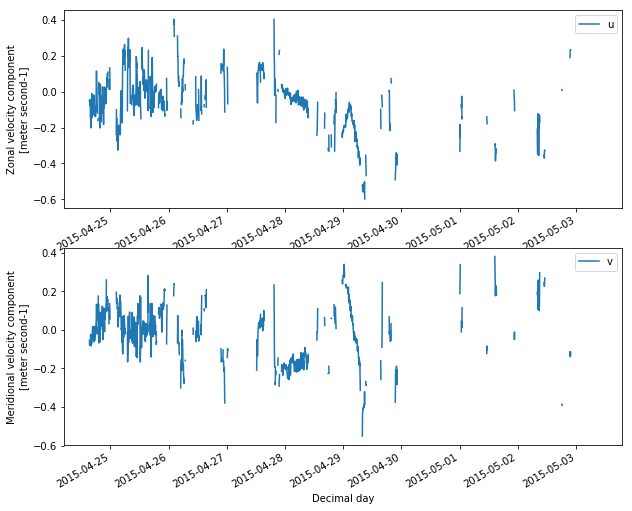

In [46]:
plt.figure(figsize=(10, 8))
keys = 'u', 'v'
for i, key in enumerate(keys):
    plt.subplot(len(keys), 1, i+1)
    adcp_ds[key][adcp_min_index : adcp_max_index + 1][:, 0].plot()
    plt.legend()
plt.show()

In [47]:
np.where(~(np.abs(adcp_ds.u.values[adcp_min_index : adcp_max_index + 1][:, 0] < 10)))[0]

array([  41,   45,   85, ..., 2518, 2519, 2520])

In [48]:
adcp_ds.u.values[adcp_min_index : adcp_max_index + 1][41, 0]

nan

## AVOS Union

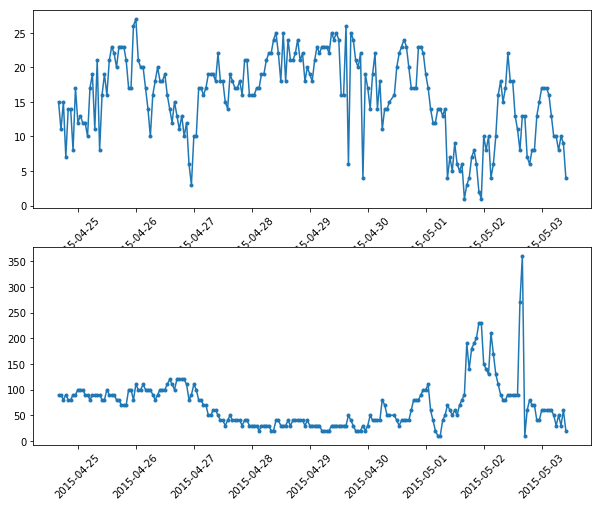

In [49]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(avos_df['Date'][avos_min_index : avos_max_index + 1], 
         avos_df['Wind speed'][avos_min_index : avos_max_index + 1], '.-')
plt.xticks(rotation=45)
plt.subplot(2, 1, 2)
plt.plot(avos_df['Date'][avos_min_index : avos_max_index + 1], 
         avos_df['Wind dir'][avos_min_index : avos_max_index + 1], '.-')
plt.xticks(rotation=45)
plt.show()

## Beacon Union

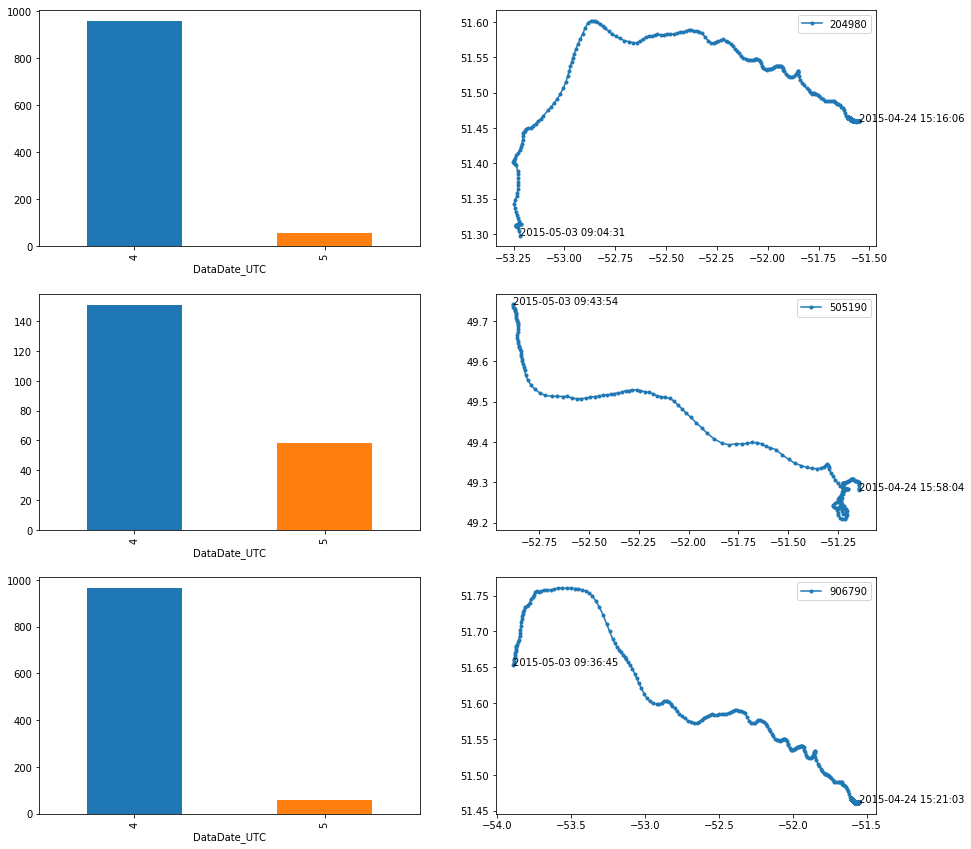

In [51]:
plt.figure(figsize=(15, 20))
num_dfs = len(beacon_df_dict.keys())
i = 1
for key, df in beacon_df_dict.items():
    try:
        beacon_min_index = np.where(df['DataDate_UTC'] >= max_of_mins)[0][0]
        beacon_max_index = np.where(df['DataDate_UTC'] <= min_of_maxs)[0][-1]
        df = df[beacon_min_index : beacon_max_index + 1].reset_index()
        plt.subplot(num_dfs, 2, i)
        df['DataDate_UTC'].groupby(df['DataDate_UTC'].dt.month).count().plot(kind="bar", label=key)
        plt.subplot(num_dfs, 2, i + 1)
        plt.plot(df['Longitude'], df['Latitude'], '.-', label=key)
        plt.annotate(df['DataDate_UTC'][0], (df['Longitude'][0], df['Latitude'][0]))
        n = len(df)
        plt.annotate(df['DataDate_UTC'][n-1], (df['Longitude'][n-1], df['Latitude'][n-1]))
        plt.legend()
    except IndexError:
        pass
    i += 2
plt.show()